# Lec 11: Expected Value 
***

In this notebook we'll practice simulating Expected Value for Discrete Random Varibles.

We'll need Numpy and Matplotlib for this notebook, so let's load them.  

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy.special import binom
%matplotlib inline

###  Simulating Roulette
*** 

A Las Vegas roulette board contains 38 numbers $\{0, 00, 1, 2, \ldots, 36\}$. Of the non-zero numbers, 18 are red and 18 are black. You can place bets on various number/color combinations and each type of bet pays-out at a different rate.  For example: 

- If you bet $\$1$ on red (or black) and win, then you win $\$1$ (i.e. you get your original dollar back, plus another dollar). 
- If you bet $\$1$ any particular number and win, then you win $\$35$ (i.e you get your original dollar back, plus $\$35$). 
- If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$). 

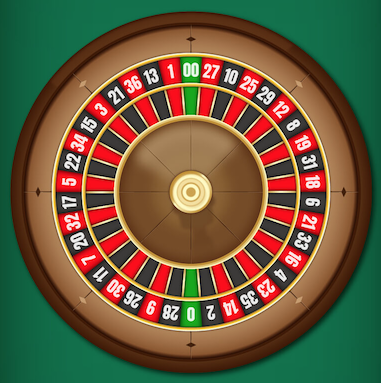

It seems like there are so many ways to win!  In reality, some very careful probability theory was done by the game designers to ensure that there is not much difference in any particular payout.  We'll explore roulette both by simulation and by hand in this exercise and continue this question in the HW. 






**Part A**  

You decide to bet $1 on the number 27.  

You repeat this 100 times and write down your net winnings for each trial, and then take the average of your net winnings.  

Let's simulate this.

Remember that the payout for hitting a number is $35$ to $1$.  

The following function simulates the spin of a Las Vegas roulette board.  

In [3]:
# Create wheel:
red = [str(ii)+"R" for ii in [1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36]] 
black = [str(ii)+"B" for ii in [2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35]]
green = [str(ii)+"G" for ii in ["0", "00"]]

wheel = red+black+green

wheel

['1R',
 '3R',
 '5R',
 '7R',
 '9R',
 '12R',
 '14R',
 '16R',
 '18R',
 '19R',
 '21R',
 '23R',
 '25R',
 '27R',
 '30R',
 '32R',
 '34R',
 '36R',
 '2B',
 '4B',
 '6B',
 '8B',
 '10B',
 '11B',
 '13B',
 '15B',
 '17B',
 '20B',
 '22B',
 '24B',
 '26B',
 '28B',
 '29B',
 '31B',
 '33B',
 '35B',
 '0G',
 '00G']

In [4]:
#Spin Roulette Wheel
np.random.choice(wheel)


'3R'

**Practice**: Code a simulation that calculates the average of your net winnings by repeatedly betting on the number 27 in `num_spins` trials.

In [5]:
#Run the following code to see multiple rounds of the simulation:


def number_winnings(number,board=wheel, num_spins=int(1e3)):
    trials = np.random.choice(board, size=num_spins)
    num_winners = np.sum(np.isin(trials, number))
    num_losers = num_spins - num_winners
    return (35*num_winners - 1*num_losers)/num_spins


ave_net_winnings = number_winnings(number="27R", num_spins=10000)

print("Average Net Winnings Per Trial= {:.3f}".format(ave_net_winnings))



Average Net Winnings Per Trial= 0.094


Plot the average net winnings as you increase number of trials.

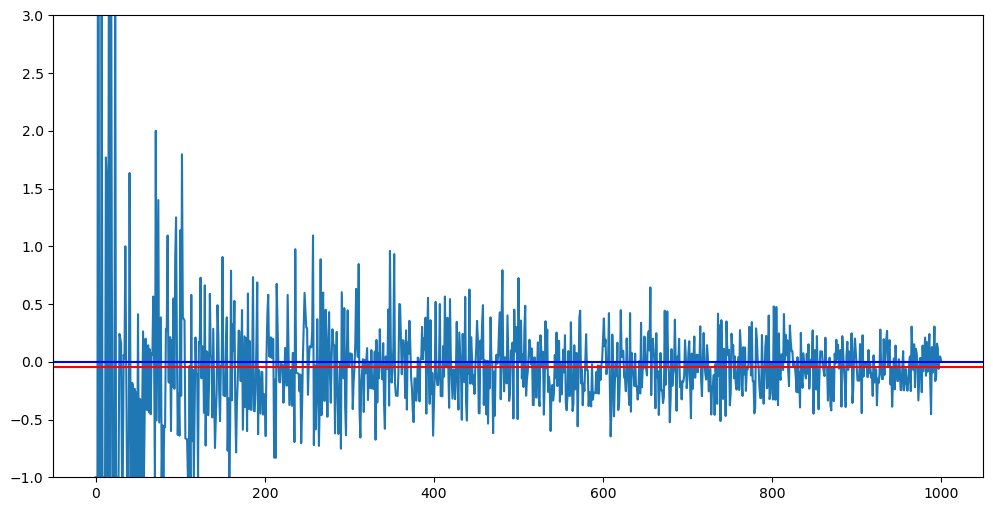

In [25]:
trials = 1000
avg_net_winnings = np.zeros(trials+1)

for t in range(1, trials+1):
    avg_net_winnings[t-1] = number_winnings(number="27R", num_spins=t)
    
# plot avg_net_winnings by number of trials
fig, ax = plt.subplots(figsize=(12,6))

ax.set_ylim(-1,3)

ax.plot(avg_net_winnings)

ax.axhline(y=0, color='b', linestyle='-')
ax.axhline(y=avg_net_winnings.mean(), color='r', linestyle='-')

**Part B** 

In part A, we were approximating what's called the Expected Value of your net winnings, using simulation.  We can actually calcuate the exact value based on the definition of Expected Value.  Back to the lecture slides to see this!